In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("independent_t_student.csv")
df

,men,women
0,66,47
1,62,55
2,53,48
3,59,42
4,54,50
...,...,...
95,66,46
96,59,49
97,51,44
98,63,42


(array([ 3.,  3., 14.,  8., 26., 18., 19.,  2.,  6.,  1.]),
 array([48. , 50.5, 53. , 55.5, 58. , 60.5, 63. , 65.5, 68. , 70.5, 73. ]),
 <BarContainer object of 10 artists>)

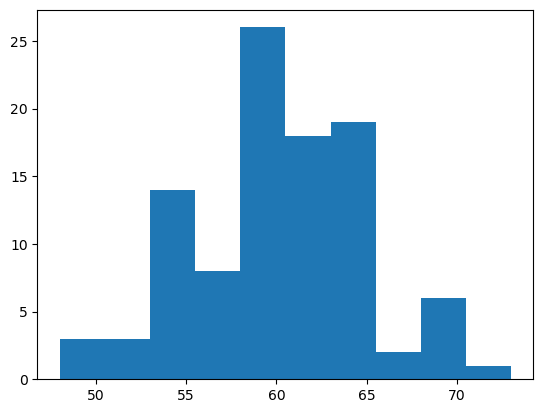

In [7]:
plt.hist(df.men)

Надо проверить гипотезу, что мужчины проводят в игре больше времени чем женщины. Проверим нулевую(обратную) гипотезу Т-критерий Стьюдента используется, когда нужно проверить гипотезу о равенстве средних значений на выборках. 

У T-критерия Стьюдента есть определённые условия для его применения:

во-первых, данные в выборках распределены нормально, их дисперсии равны;
во-вторых, выборки должны быть независимы друг от друга.


(array([ 5.,  8., 15., 15., 19., 16.,  8.,  6.,  6.,  2.]),
 array([41. , 42.9, 44.8, 46.7, 48.6, 50.5, 52.4, 54.3, 56.2, 58.1, 60. ]),
 <BarContainer object of 10 artists>)

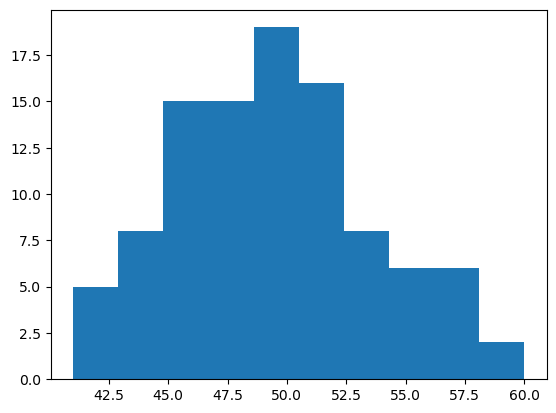

In [8]:
plt.hist(df.women)

In [9]:
from scipy import stats

Для проверки нормально ли распределены данные используется тест Шапиpо-Уилка, усли p_value > 0.05, проверка пройдена

In [10]:
stats.shapiro(df.women)

ShapiroResult(statistic=0.9810581207275391, pvalue=0.16058889031410217)

In [11]:
stats.shapiro(df.men)

ShapiroResult(statistic=0.9900974631309509, pvalue=0.6724756956100464)

Для проверки одинаковые ли дисперсии двух выборок используется тест Левена

In [12]:
stats.levene(df.men, df.women)

LeveneResult(statistic=0.2644266082613287, pvalue=0.6076686464894372)

T-критерий Стьюдента

In [13]:
stats.ttest_ind(df.men, df.women)

TtestResult(statistic=16.422524648309142, pvalue=8.206721395990692e-39, df=198.0)

Т-критерий Уэлича, для выборок с неравными дисперсиями

In [14]:
stats.ttest_ind(df.men, df.women, equal_var=False)

TtestResult(statistic=16.422524648309142, pvalue=9.940369712406375e-39, df=196.66421202306847)

One-Tail test (только 2 варианта) 
проверяем проводят ли мужчины больше времени чем женщины

In [15]:
stats.ttest_ind(df.men, df.women, equal_var=False, alternative="greater")

TtestResult(statistic=16.422524648309142, pvalue=4.9701848562031876e-39, df=196.66421202306847)

маленькое пвэлью, гипотеза отвергается

Для зависимых данных:

In [16]:
df2 = pd.read_csv("dependent_t.csv")
df2

,id,pre,post
0,928,71.709023,76.969025
1,813,64.603133,75.304607
2,863,72.447850,82.358080
3,618,68.202316,72.145752
4,865,66.706736,79.344155
...,...,...,...
95,925,70.221514,81.233528
96,586,68.639644,74.354524
97,664,69.969183,74.773174
98,864,65.045205,85.257776


Гипотеза: средний балл учеников улучшился после просмотра вебинара. 
Используем парный Т-критерий (каждому значению из первой выборки соответствует значение из второй)
Для этого данные  должны быть распределены нормально и выборки зависимы

In [17]:
stats.shapiro(df2.pre)

ShapiroResult(statistic=0.9940343499183655, pvalue=0.9419046640396118)

In [18]:
stats.shapiro(df2.post)

ShapiroResult(statistic=0.985990047454834, pvalue=0.3733612596988678)

In [19]:
stats.ttest_rel(df2.pre, df2.post, alternative="less")

TtestResult(statistic=-16.160279927323444, pvalue=8.089311044408884e-30, df=99)

Проверка гипотезы для данных, не подчиняющихся нормальному распределению
люди до 18 ставят оценки выше 


In [20]:
df3 = pd.read_csv("mann_whitney.csv")
df3

,feedback,age
0,5,28
1,5,28
2,4,26
3,4,18
4,2,15
5,1,28
6,4,14
7,2,18
8,3,16
9,4,19


In [22]:
before_18 = df3[df3.age <= 18].feedback
after_18 = df3[df3.age > 18].feedback
print(len(after_18), len(before_18))

15 15


Т-критерий Манна-Уитни для подтверждения гипотезы на независимых выборках, не подчиняющихся нормальному распределению
Н0: возраст не влияет на оценку, если пвэлью больше 5 процентов, не можем опровергнуть гипотезу

In [24]:
stats.mannwhitneyu(before_18, after_18, alternative="greater")

MannwhitneyuResult(statistic=46.0, pvalue=0.9978023851377417)

In [25]:
stats.mannwhitneyu(before_18, after_18, alternative="less")

MannwhitneyuResult(statistic=46.0, pvalue=0.002509619590681187)